***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***2019***


Credits: The data imports were extracted from https://cran.r-project.org/web/packages/keras/vignettes/tutorial_basic_classification.html

***NOTE***

Be sure to use hardware acceleration to use the GPU. Click on `Runtime`, change `runtime type`, and select `GPU` for the *hardware accelerator* option.

In [88]:
devtools::install_github("rstudio/keras")

Skipping install of 'keras' from a github remote, the SHA1 (34dc89ed) has not changed since last install.
  Use `force = TRUE` to force installation


## Import the Keras library

In [0]:
library(keras)

## Load the Fashion MNIST dataset

Further details about the dataset are available here: https://tensorflow.rstudio.com/keras/reference/dataset_fashion_mnist.html

In [0]:
fashion_mnist <- dataset_fashion_mnist()

## Load features

In [0]:
c(x_train, y_train) %<-% fashion_mnist$train
c(x_test, y_test) %<-% fashion_mnist$test

## Check dimension

There are 60,000 images. Each image has a size of 28x28 just like the original MNIST dataset.

In [92]:
dim(x_train)

[1] 60000    28    28

## Reshape

Keras wants the dimension for CNNs to be the following: [batches, width, height, channels] so we need to reshape the data by adding the channel dimension.

To do the reshape we use the `array_reshape` function, further information can be found here: https://www.rdocumentation.org/packages/reticulate/versions/1.13/topics/array_reshape

In [0]:
x_train <- array_reshape(x_train, c(nrow(x_train), 28, 28, 1))
x_test <- array_reshape(x_test, c(nrow(x_test), 28, 28, 1))

## Take a look at a  training example

The dimension is correct but take a look at the values in the data point. The values are large, between 0 and 255. Thus we will need to normalise the values.

In [94]:
dim(x_train[1,,,])

[1] 28 28

In [95]:
print(x_train[1,,,1])

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [2,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [4,]    0    0    0    0    0    0    0    0    0     0     0     0     1
 [5,]    0    0    0    0    0    0    0    0    0     0     0     0     3
 [6,]    0    0    0    0    0    0    0    0    0     0     0     0     6
 [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [8,]    0    0    0    0    0    0    0    0    0     0     0     1     0
 [9,]    0    0    0    0    0    0    0    0    0     1     1     1     0
[10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[11,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[12,]    0    0    0    0    0    0    0    0    0     1     3     0    12
[13,]    0    0    0    0

## Normalise

A typical image is made up of values ranging from 0 to 255, so we can normalise by dividing by the maximum value which in this case is 255.

In [0]:
x_train <- x_train / 255
x_test <- x_test / 255

Now we can check the values. This looks better and is suitable for a CNN.

In [97]:
print(x_train[1,,,1])

             [,1]       [,2]        [,3]       [,4]       [,5]       [,6]
 [1,] 0.000000000 0.00000000 0.000000000 0.00000000 0.00000000 0.00000000
 [2,] 0.000000000 0.00000000 0.000000000 0.00000000 0.00000000 0.00000000
 [3,] 0.000000000 0.00000000 0.000000000 0.00000000 0.00000000 0.00000000
 [4,] 0.000000000 0.00000000 0.000000000 0.00000000 0.00000000 0.00000000
 [5,] 0.000000000 0.00000000 0.000000000 0.00000000 0.00000000 0.00000000
 [6,] 0.000000000 0.00000000 0.000000000 0.00000000 0.00000000 0.00000000
 [7,] 0.000000000 0.00000000 0.000000000 0.00000000 0.00000000 0.00000000
 [8,] 0.000000000 0.00000000 0.000000000 0.00000000 0.00000000 0.00000000
 [9,] 0.000000000 0.00000000 0.000000000 0.00000000 0.00000000 0.00000000
[10,] 0.000000000 0.00000000 0.000000000 0.00000000 0.00000000 0.00000000
[11,] 0.000000000 0.00000000 0.000000000 0.00000000 0.00000000 0.00000000
[12,] 0.000000000 0.00000000 0.000000000 0.00000000 0.00000000 0.00000000
[13,] 0.000000000 0.00000000 0.0000000

## Convert targets/labels to their one-hot encoded equivalent

We need to convert the categorical targets into their one-hot encoded values. Keras has a built in function `to_categorical` which does this for you.

Further information about the to_categorical function can be found here: https://keras.rstudio.com/reference/to_categorical.html

In [0]:
y_train <- to_categorical(y_train, 10)
y_test <- to_categorical(y_test, 10)

## Verify that the dimensions of the targets are correct

In the previous cell we applied one-hot encoding so we need to make sure that the dimension is 10.

In [99]:
dim(y_train)

[1] 60000    10

## Create a model

We specify an input shape of `c(28, 28, 1)`.

The architecture is as follows: two convolutional layers, followed by max pooling and dropout, then a fully connected layer with dropout and finally the output fully connected layer. The last layer has 10 units (one for each fashion item - there are 10 items/targets). 

Note that between the max pooling layer and the first fully connected layer is the flattening operation `layer_flatten()`. This is how we go from convolutional based layers to fully connected ones.

Remember that we need to specify the input shape in the first layer of any network in Keras, this is done using `input_shape = ...`. In this case we know that the input is an image of shape 28x28x1 (the last value of 1 is due to the fact that the image is a greyscaled image; a colour image would be 3). 

In [0]:
model <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu',input_shape = c(28,28,1)) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_dropout(rate = 0.25) %>% # The rate denotes the fraction of the input units to drop.
  layer_flatten() %>%  # We use the flatten function to go from the CNN structure to the MLP
  layer_dense(units = 128, activation = 'relu') %>% # the MLP starts here
  layer_dropout(rate = 0.5) %>% # The rate denotes the fraction of the input units to drop.
  layer_dense(units = 10, activation = 'softmax') # 10 units because there are 10 targets

## Compile the model

In [0]:
model %>% compile(
  loss = loss_categorical_crossentropy,
  optimizer = 'adam',
  metrics = c('accuracy')
)

## Early stopping to avoid over-fitting

Keras can monitor the validation loss across each epoch. Early stopping allows Keras to stop trainining if the validation loss does not improve over a pre-defined number of epochs (patient parameter). Here we set the patience parameter to 3. This means that Keras will stop training if the validation loss does not improve across 3 epochs.

In [0]:
# The patience parameter is the amount of epochs to check for improvement.
early_stop <- callback_early_stopping(monitor = "val_loss", patience = 3)

## Train the model

Here we specify a very large number of epochs but have early stopping set to 3 epochs.

You will notice that the plot will not display data points for 75 epochs and that is because the early stopping prevented the training to continue to help deal with overfitting issues.

For training, we need to specify the training features, training targets as well as the number of epochs. It's a good idea to set aside some data for validation as we can tweak our model based on the validation performance.

In [0]:
history <- model %>% fit(
  x_train,
  y_train,
  epochs = 75,
  validation_split = 0.2,
  verbose = 1,
  batch_size = 128,
  callbacks = list(early_stop)
)

### Plot the performance

We can see from the plots that the training stops early. We can then go ahead and modify the epochs above and reduce them if we wanted to.

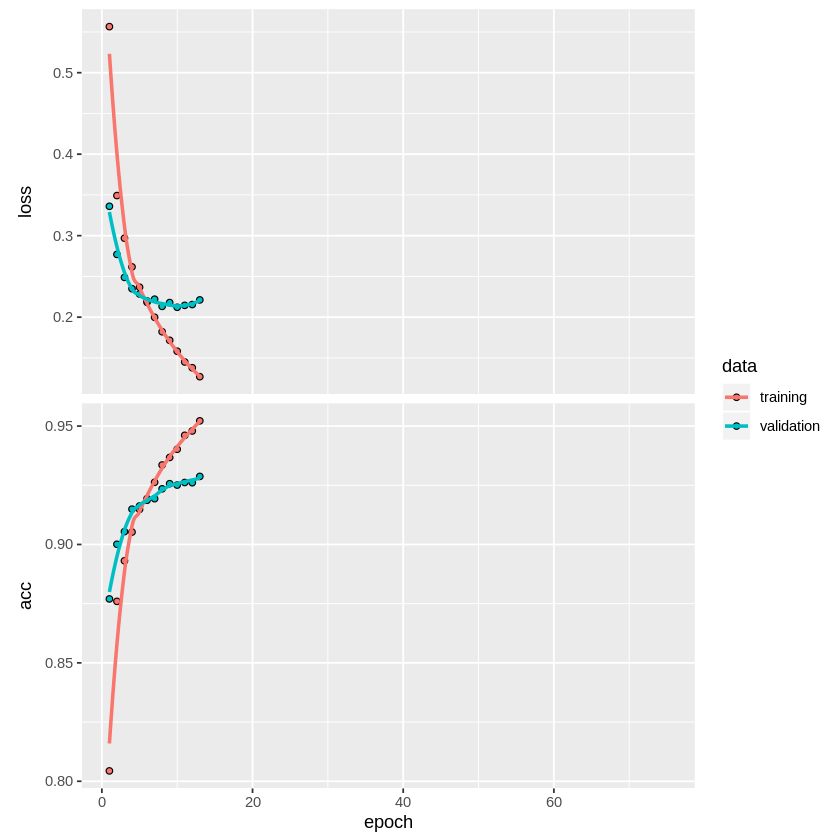

In [104]:
plot(history)

## Evaluate the performance

Plug in the testing data and evaluate the performance.

In [105]:
model %>% evaluate(x_test, y_test)

$loss
[1] 0.2324029

$acc
[1] 0.9251

## Note

Note that if you want to re-train a model you have to execute the cells which create the model, re-compile it, and then only call the fit function. If you call the fit function several times (without re-creating the model), Keras will resume training from the previous state of the weights. By re-executing the cells which create the model Keras re-initialises the weights to random values.

## Prediction

To predict on the entire test data we can use the following

In [0]:
predictions <- model %>% predict(x_test)

Let's view the prediction for an example (test example 14). We can see that the model is quite confident that the test image corresponds to the 4th class with a softmax value of 0.99.

In [107]:
predictions[14,]

[1] 6.278869e-07 3.272211e-07 7.682037e-10 9.999990e-01 2.801068e-09
 [6] 1.866228e-12 1.376141e-08 3.079999e-13 1.444300e-09 1.234831e-12

However, we might want to view the actual class prediction as opposed to probabilities. Below we illustrate how to obtain the actual class prediction for a test image (test example 14).

In [108]:
which.max(predictions[14, ])

[1] 4

## Can you improve the performance on the test data by modifying the network?